# Estudo de parâmetros

## Gráficos para analisar resultados

Categorias de grafos consideradas:
- DSJ: grafos aleatórios abordados em Johnson, Aragon et al. (1991);37
- LEI: grafos de Leighton com tamanho garantido de coloração (LEIGHTON, 1979);
- MYC: grafos baseados na transformação de Mycielski (FAN, 2004);
- CAR: grafos de k-Inserção (k-Insertion) e de Inserção Completa (Full Insertion), que
tratam-se de uma generalização dos grafos do grupo MYC, com vértices inseridos
para aumentar o tamanho dos graphos, mas manter sua densidade.
- SGB: grafos da Base de Grafos de Stanford, de Donald Knuth (Stanford GraphBase)
(KNUTH, 1993);
- HOS: grafos obtido de uma abordagem via de particionamento de matrizes em colunas
segmentadas ao problema da determinação de matrizes Jacobianas esparsas;
- REG: grafos baseados em códigos reais de um problema de alocação de registradores
(LEWANDOWSKI; CONDON, 1996)
- GOM:

Será analisado um grafo por categoria, considerando somente os grafos que não atingiram o valor de zero conflitos na solução inicial com greedy method. Dessa maneira, não serão considerados os grafos das categorias MYC e REG, para as quais todas as instâncias tiveram solução inicial ótima com método guloso.

| Graph | $\chi$ / k |  $V$ | $E$ | Categoria |
|-|-|-|-|-|
|le450_15c|(15/15)|450|16680|LEI|
|DSJC250.1|(?/8)|250|3218|DSJ|
|queen13_13|(13/13)|169|6656|SGB|
|will199GPIA|(7/7)|701|6772|HOS|
|4-FullIns_4|(8/8)|690|6650|CAR|
|qg.order30|(30/30)|900|26100|GOM|


Conjuntos de parâmetros testados:
- Número de abelhas: $n$ = [50 100 200 300 400]
- Número máximo de iterações sem melhora (critério de parada): $max_iter$ = [20 50 70 80]
- Limite de iterações sem melhora antes de reiniciar a abelha: $limit$ = [5 10 25 50]

Além disso, foram utilizados três métodos de geração de solução inicial.
- Random: Soluções iniciais construídas aleatoriamente (sem controle de diversidade)
- Pseudo-greedy: Soluções iniciais construídas com sorteio das cores para as duas primeiras posições do array da solução, e em seguida aplicado um Greedy-Method.
- Método de construção GRASP: Nessa etapa, parte do GRASP é implementada, com as posições sendo preenchidas aleatoriamente de uma lista restrita de candidatos.

In [12]:
instances = ['le450_15c', 'DSJC500.5', 'queen13_13', 'will199GPIA', '4-FullIns_4', 'qg.order30']
results_folder = 'results_abc'
init_method = 'pseudo_greedy'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [3]:
!ls

 AnalyseParameters.ipynb	       main_test_simulated_annealing.cpp
 Optuna.ipynb			       main_test_tabu_search
 Optuna.ipynb:Zone.Identifier	       main_test_tabu_search.cpp
 README.md			       resultado_calibrar_parametro
 documentacao.md		       results_abc
 include			       results_abc_2
 instance_calibrar.csv		       results_grasp
 instances			       results_greedy
 instances_info.csv		       results_sa
'instances_with_k copy.csv'	       results_tabu
 instances_with_k.csv		       run_abc
 instances_with_k2.csv		       run_abc_calib
 instances_with_k_abc_2.csv	       run_grasp
 instances_with_k_no_greedy_zero.csv   run_greedy
 lib				       run_main_abc.cpp
 main				       run_main_abc_calibrar_parametros.cpp
 main.cpp			       run_main_abc_until_zero.cpp
 main_test_fwlist		       run_main_grasp.cpp
 main_test_fwlist.cpp		       run_main_greedy.cpp
 main_test_grasp		       run_main_sa.cpp
 main_test_grasp.cpp		       run_main_tabu.cpp
 main_test_greedy		       run_sa
 main_test_gree

In [13]:
columns = ["fitness", "execution_time", "num_bees", "limit", "max_iter",
           "filename", "num_vertices", "num_edges"]
df = pd.read_csv(f'{results_folder}/{init_method}/le450_15c.txt', sep=';', names=columns, header=None)
df.tail()

,fitness,execution_time,num_bees,limit,max_iter,filename,num_vertices,num_edges
2395,302,5126410,400,50,80,instances/le450_15c.col,450,16680
2396,301,4632364,400,50,80,instances/le450_15c.col,450,16680
2397,313,3372878,400,50,80,instances/le450_15c.col,450,16680
2398,305,4945915,400,50,80,instances/le450_15c.col,450,16680
2399,308,4909147,400,50,80,instances/le450_15c.col,450,16680


In [27]:
def load_dataframes(path, instances, names):
    dfs = []
    for file in instances:
        df = pd.read_csv(f'{path}/{file}.txt', sep=';', names=names)
        df = df.apply(pd.to_numeric, errors='coerce')
        df['instance_name'] = file  # Adicionar uma coluna com o nome do arquivo
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [ ]:
def segmented_plot(df, instance_name, segmented_by, hue_by):
    mask = (df['instance_name'] == instance_name)
    for nc in sorted(df[mask]['num_colors'].unique()):
        df_temp = df[ mask & (df['num_colors']==nc) ]
        f, axes = plt.subplots(1, 3, figsize=(4*3,4), sharey=True)
        sns.barplot(df_temp, x=segmented_by, y='fitness', hue=hue_by)
        plt.suptitle(f'Number of Colors = {nc}')
        plt.tight_layout()
        plt.show()

In [32]:
path = f'{results_folder}/{init_method}'
print(path)
df = load_dataframes(path, instances, columns).drop(columns=['filename'])
df.tail()

results_abc/pseudo_greedy


,fitness,execution_time,num_bees,limit,max_iter,num_vertices,num_edges,instance_name
14395,76,4745750,400,50,80,900,26100,qg.order30
14396,77,5738361,400,50,80,900,26100,qg.order30
14397,78,4745220,400,50,80,900,26100,qg.order30
14398,79,5529864,400,50,80,900,26100,qg.order30
14399,80,4753874,400,50,80,900,26100,qg.order30


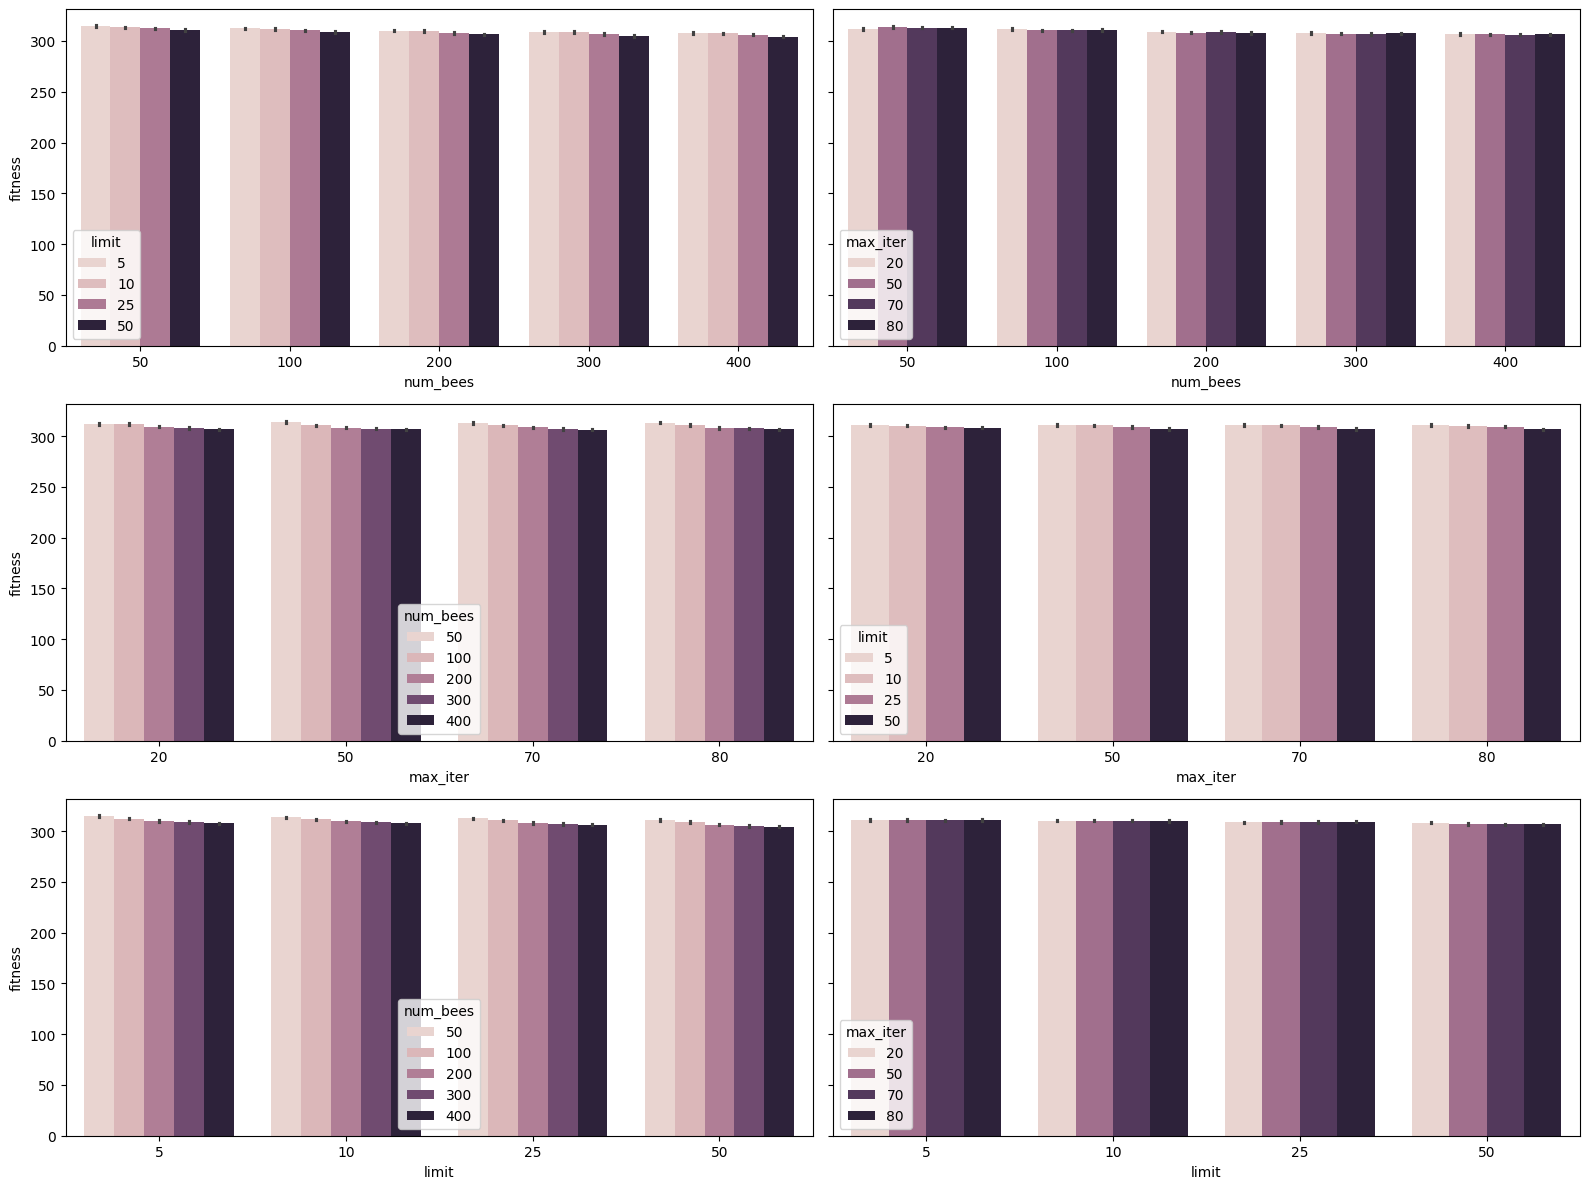

In [53]:
mask = df['instance_name'] == 'le450_15c'

f, axes = plt.subplots(3, 2, figsize=(16, 12), sharey=True)
sns.barplot(df[mask], x='num_bees', y='fitness', hue='limit', ax=axes[0, 0])
sns.barplot(df[mask], x='num_bees', y='fitness', hue='max_iter', ax=axes[0, 1])
sns.barplot(df[mask], x='max_iter', y='fitness', hue='num_bees', ax=axes[1, 0])
sns.barplot(df[mask], x='max_iter', y='fitness', hue='limit', ax=axes[1, 1])
sns.barplot(df[mask], x='limit', y='fitness', hue='num_bees', ax=axes[2, 0])
sns.barplot(df[mask], x='limit', y='fitness', hue='max_iter', ax=axes[2, 1])
plt.tight_layout()
plt.show()

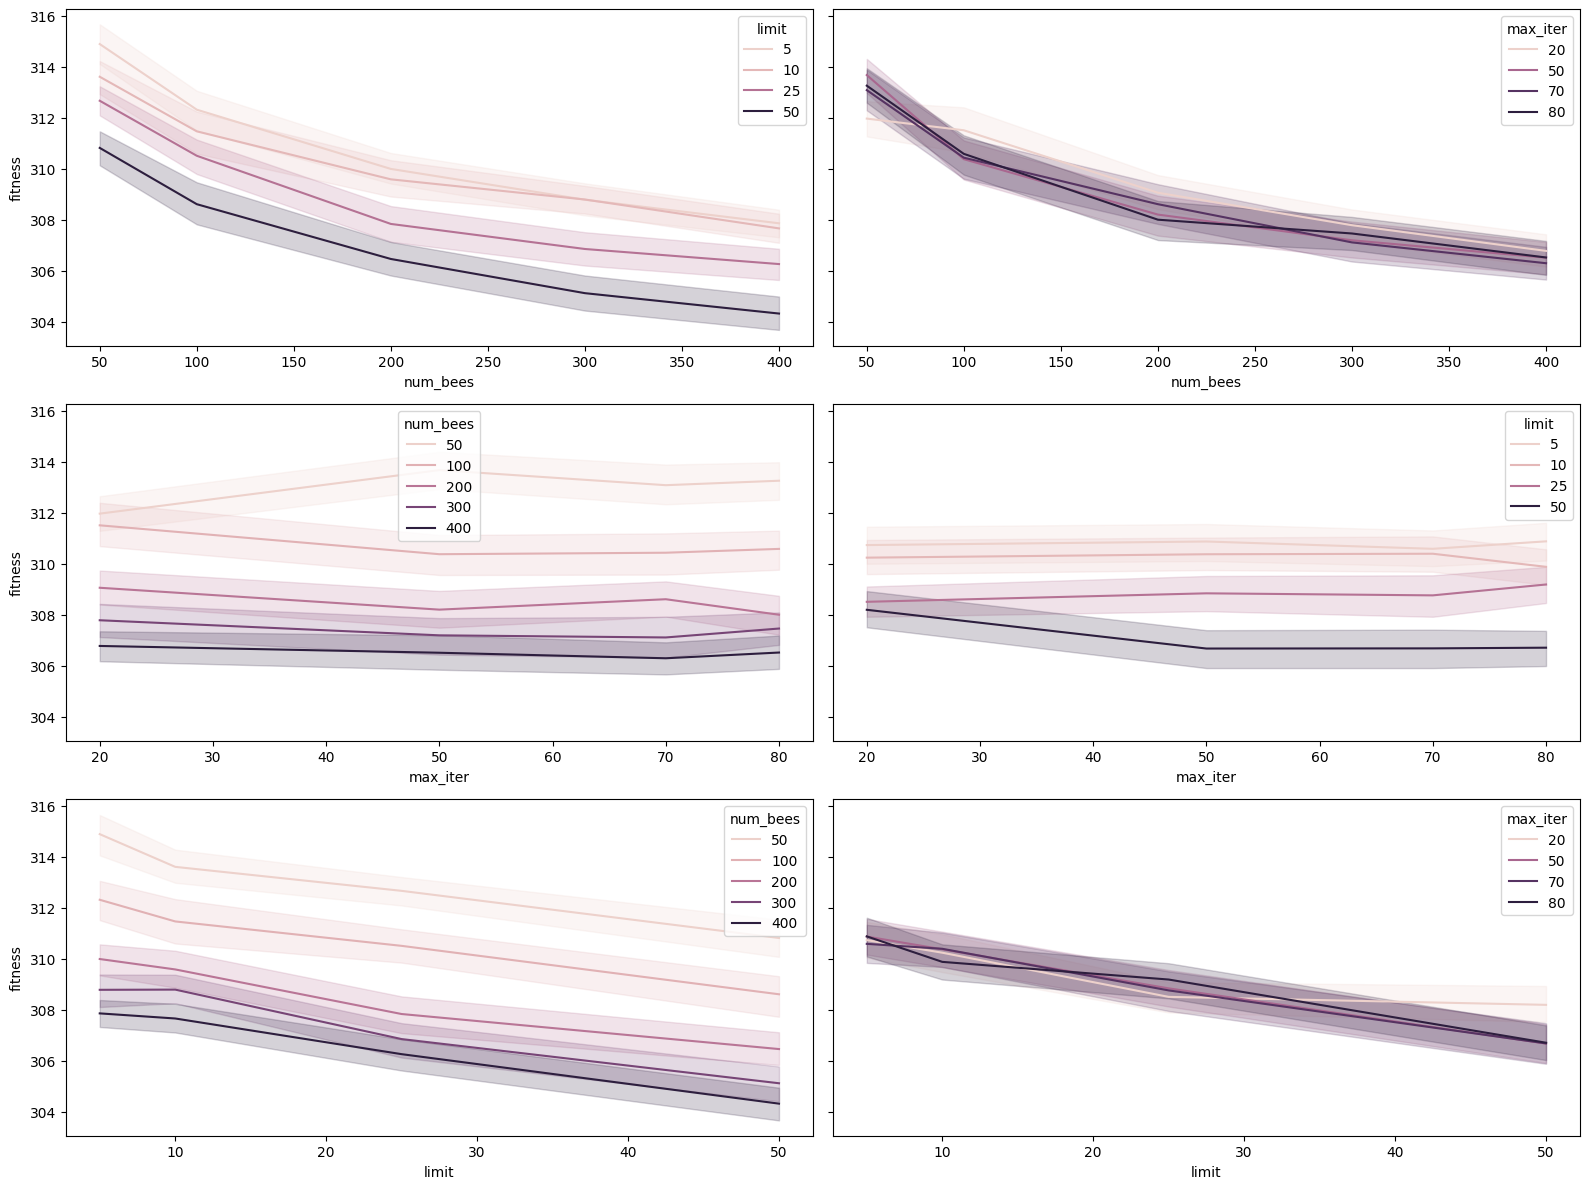

In [52]:
mask = df['instance_name'] == 'le450_15c'

f, axes = plt.subplots(3, 2, figsize=(16, 12), sharey=True)
sns.lineplot(df[mask], x='num_bees', y='fitness', hue='limit', ax=axes[0, 0])
sns.lineplot(df[mask], x='num_bees', y='fitness', hue='max_iter', ax=axes[0, 1])
sns.lineplot(df[mask], x='max_iter', y='fitness', hue='num_bees', ax=axes[1, 0])
sns.lineplot(df[mask], x='max_iter', y='fitness', hue='limit', ax=axes[1, 1])
sns.lineplot(df[mask], x='limit', y='fitness', hue='num_bees', ax=axes[2, 0])
sns.lineplot(df[mask], x='limit', y='fitness', hue='max_iter', ax=axes[2, 1])
plt.tight_layout()
plt.show()

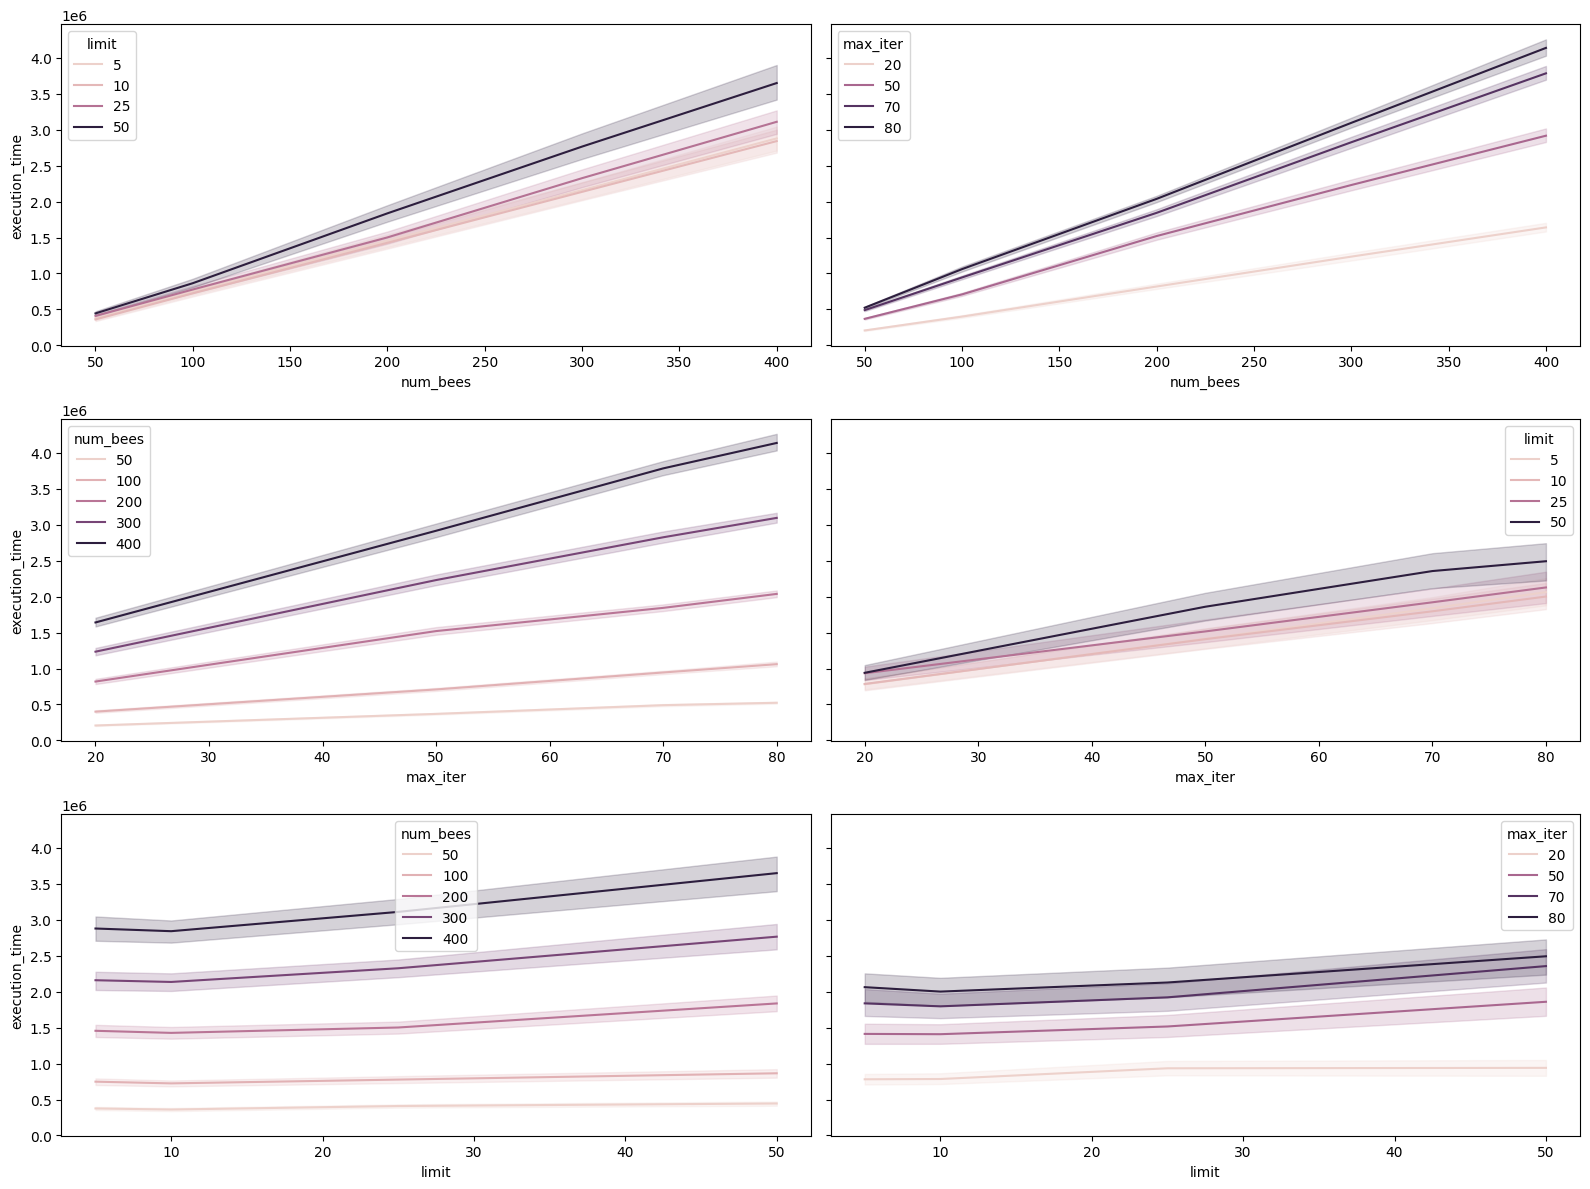

In [51]:
mask = df['instance_name'] == 'le450_15c'

f, axes = plt.subplots(3, 2, figsize=(16, 12), sharey=True)
sns.lineplot(df[mask], x='num_bees', y='execution_time', hue='limit', ax=axes[0, 0])
sns.lineplot(df[mask], x='num_bees', y='execution_time', hue='max_iter', ax=axes[0, 1])
sns.lineplot(df[mask], x='max_iter', y='execution_time', hue='num_bees', ax=axes[1, 0])
sns.lineplot(df[mask], x='max_iter', y='execution_time', hue='limit', ax=axes[1, 1])
sns.lineplot(df[mask], x='limit', y='execution_time', hue='num_bees', ax=axes[2, 0])
sns.lineplot(df[mask], x='limit', y='execution_time', hue='max_iter', ax=axes[2, 1])
plt.tight_layout()
plt.show()

<Axes: xlabel='fitness', ylabel='execution_time'>

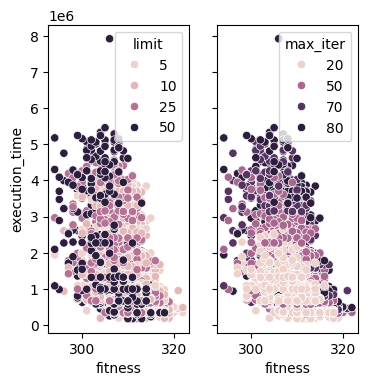

In [57]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharey=True)
sns.scatterplot(df[mask], x='fitness', y='execution_time', hue='limit', ax=axes[0])
sns.scatterplot(df[mask], x='fitness', y='execution_time', hue='max_iter', ax=axes[1])

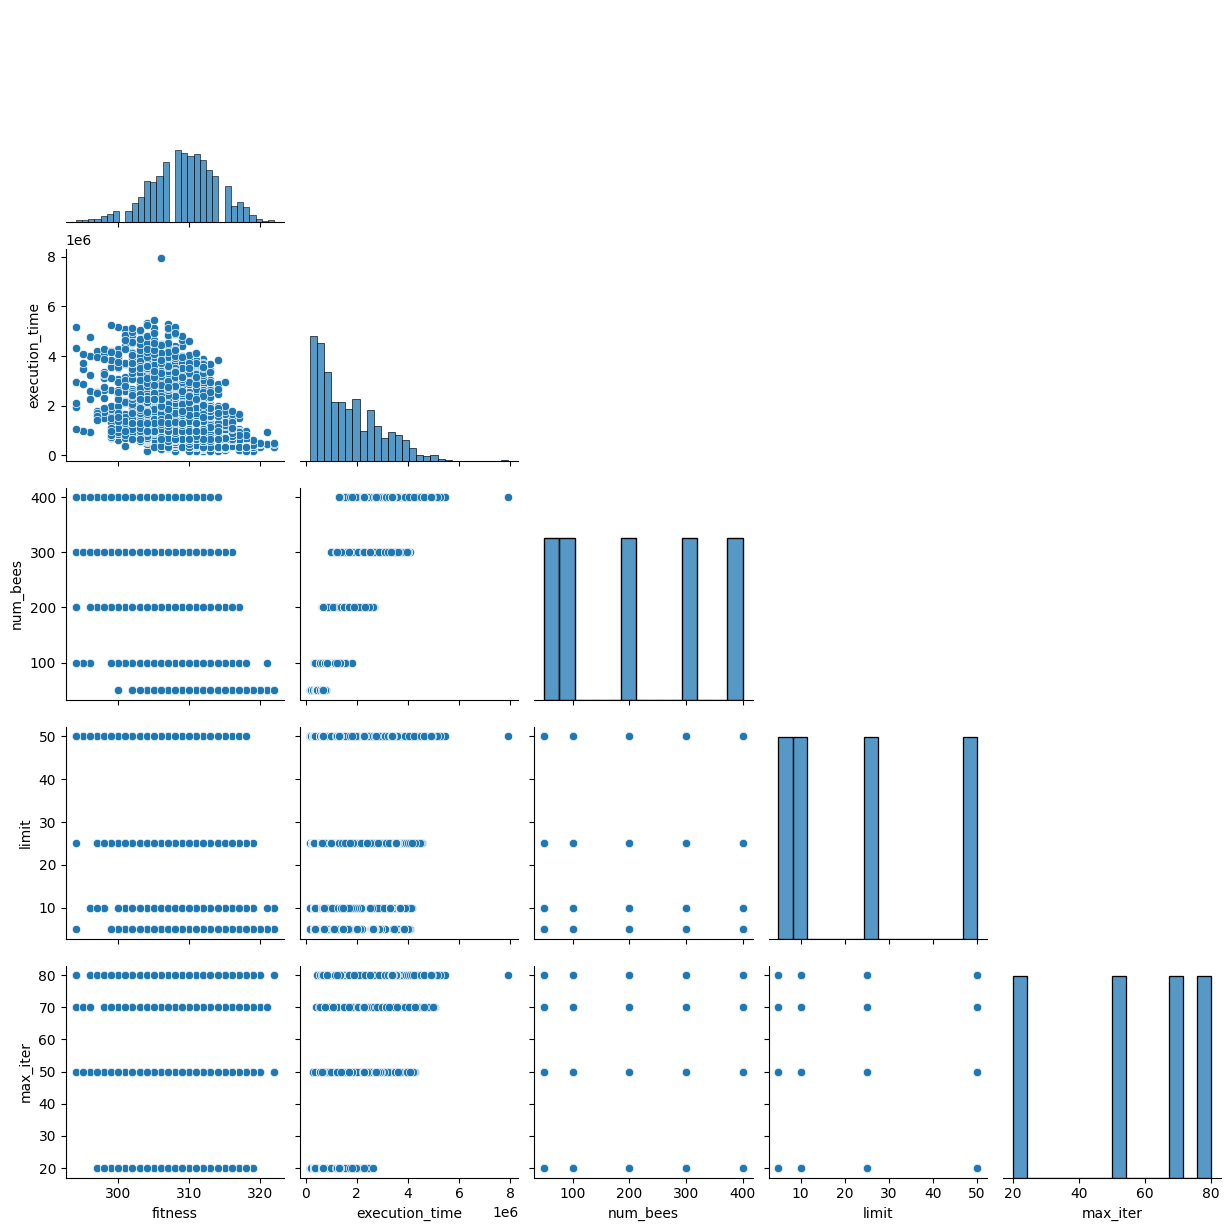

In [50]:
pairplot_columns = ["fitness", "execution_time", "num_bees", "limit", "max_iter"]
sns.pairplot(df[mask], vars=pairplot_columns, corner=True)

# Teste de hipóteses

# Versão após corrigir random seed

## Análise visual dos parâmetros

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [36]:
results_folder = 'results_abc_v3'
inner_folder = 'calibrar'

In [37]:
columns = ['conflitos', 'tempo_us', 'iter_found_best', 'num_bees', 
           'limit', 'max_iter', 'filename', 'random_search',
           'num_vertices', 'num_edges']
df = pd.read_csv(f'{results_folder}/{inner_folder}/DSJC250.1.txt', sep=';', names=columns, header=None)
df.tail()

,conflitos,tempo_us,iter_found_best,num_bees,limit,max_iter,filename,random_search,num_vertices,num_edges
1435,66,302609,10,100,500,10,instances/DSJC250.1.col,p,250,3218
1436,75,181866,1,100,500,10,instances/DSJC250.1.col,p,250,3218
1437,69,221799,4,100,500,10,instances/DSJC250.1.col,p,250,3218
1438,69,199406,2,100,500,10,instances/DSJC250.1.col,p,250,3218
1439,70,168982,0,100,500,10,instances/DSJC250.1.col,p,250,3218


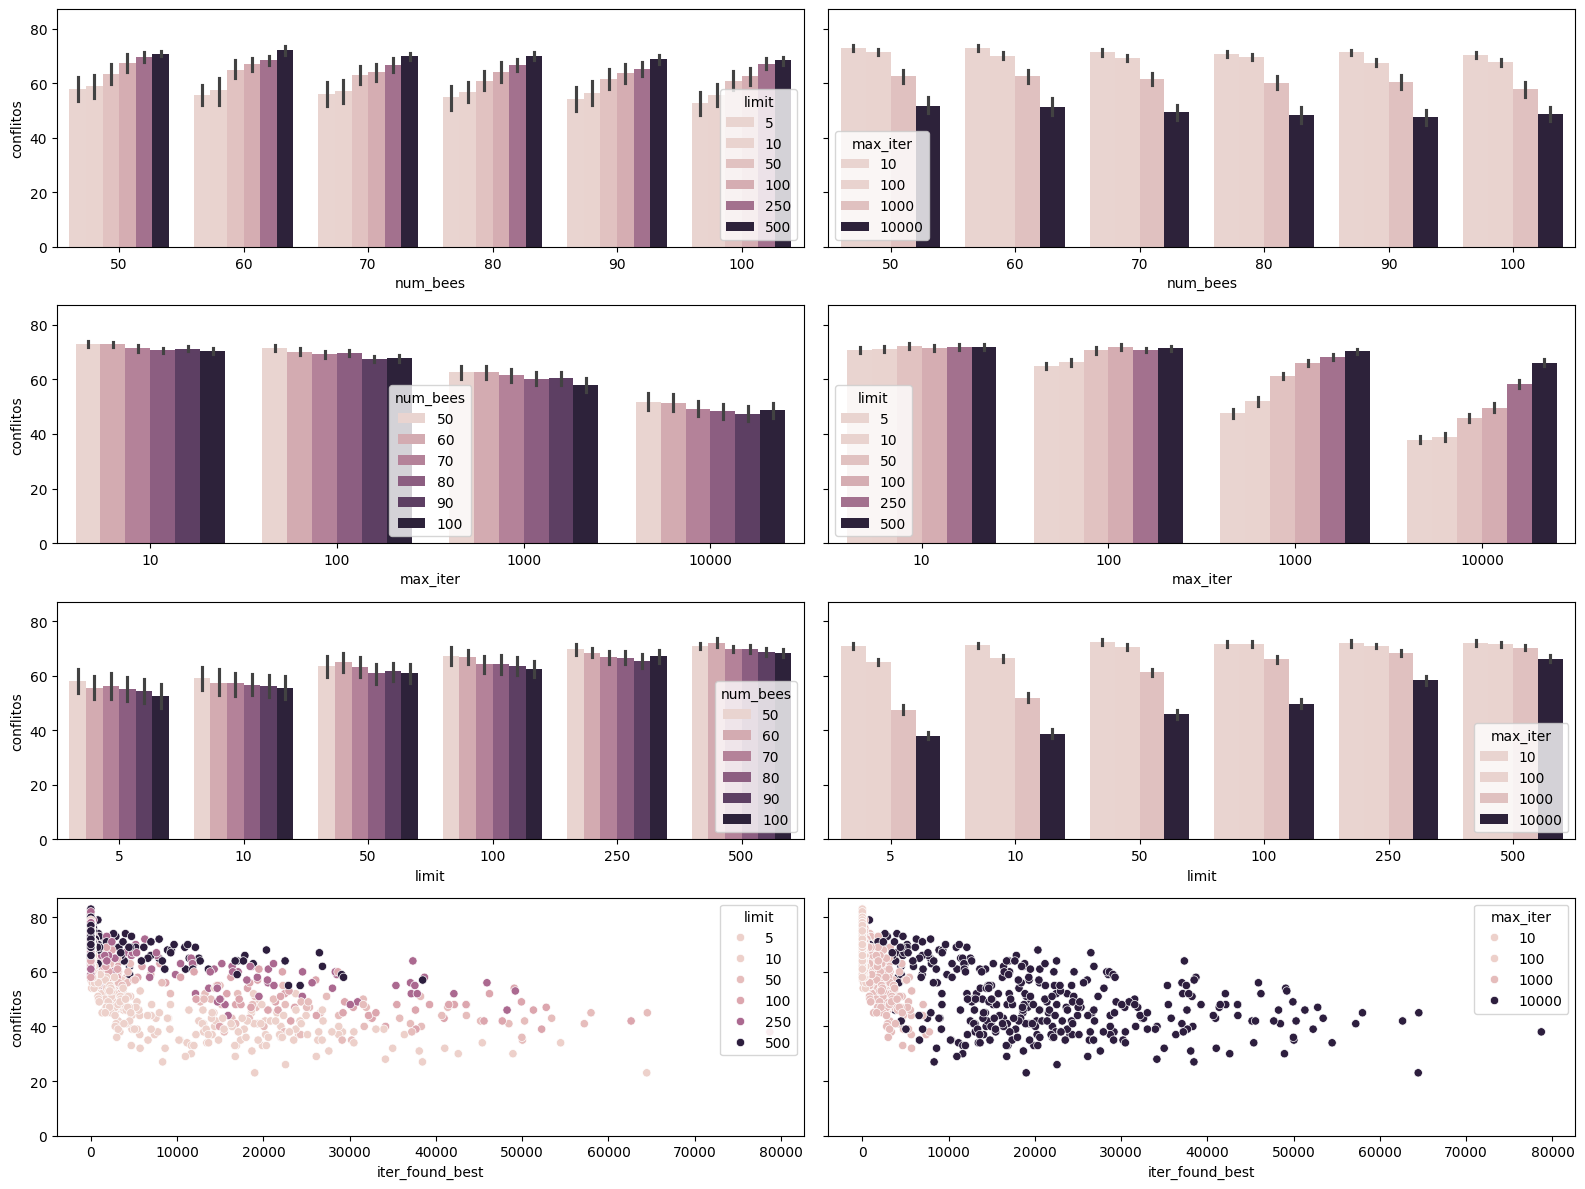

In [38]:
f, axes = plt.subplots(4, 2, figsize=(16, 12), sharey=True)
sns.barplot(df, x='num_bees', y='conflitos', hue='limit', ax=axes[0, 0])
sns.barplot(df, x='num_bees', y='conflitos', hue='max_iter', ax=axes[0, 1])
sns.barplot(df, x='max_iter', y='conflitos', hue='num_bees', ax=axes[1, 0])
sns.barplot(df, x='max_iter', y='conflitos', hue='limit', ax=axes[1, 1])
sns.barplot(df, x='limit', y='conflitos', hue='num_bees', ax=axes[2, 0])
sns.barplot(df, x='limit', y='conflitos', hue='max_iter', ax=axes[2, 1])
sns.scatterplot(df, x='iter_found_best', y='conflitos', hue='limit', ax=axes[3, 0])
sns.scatterplot(df, x='iter_found_best', y='conflitos', hue='max_iter', ax=axes[3, 1])
plt.tight_layout()
plt.show()

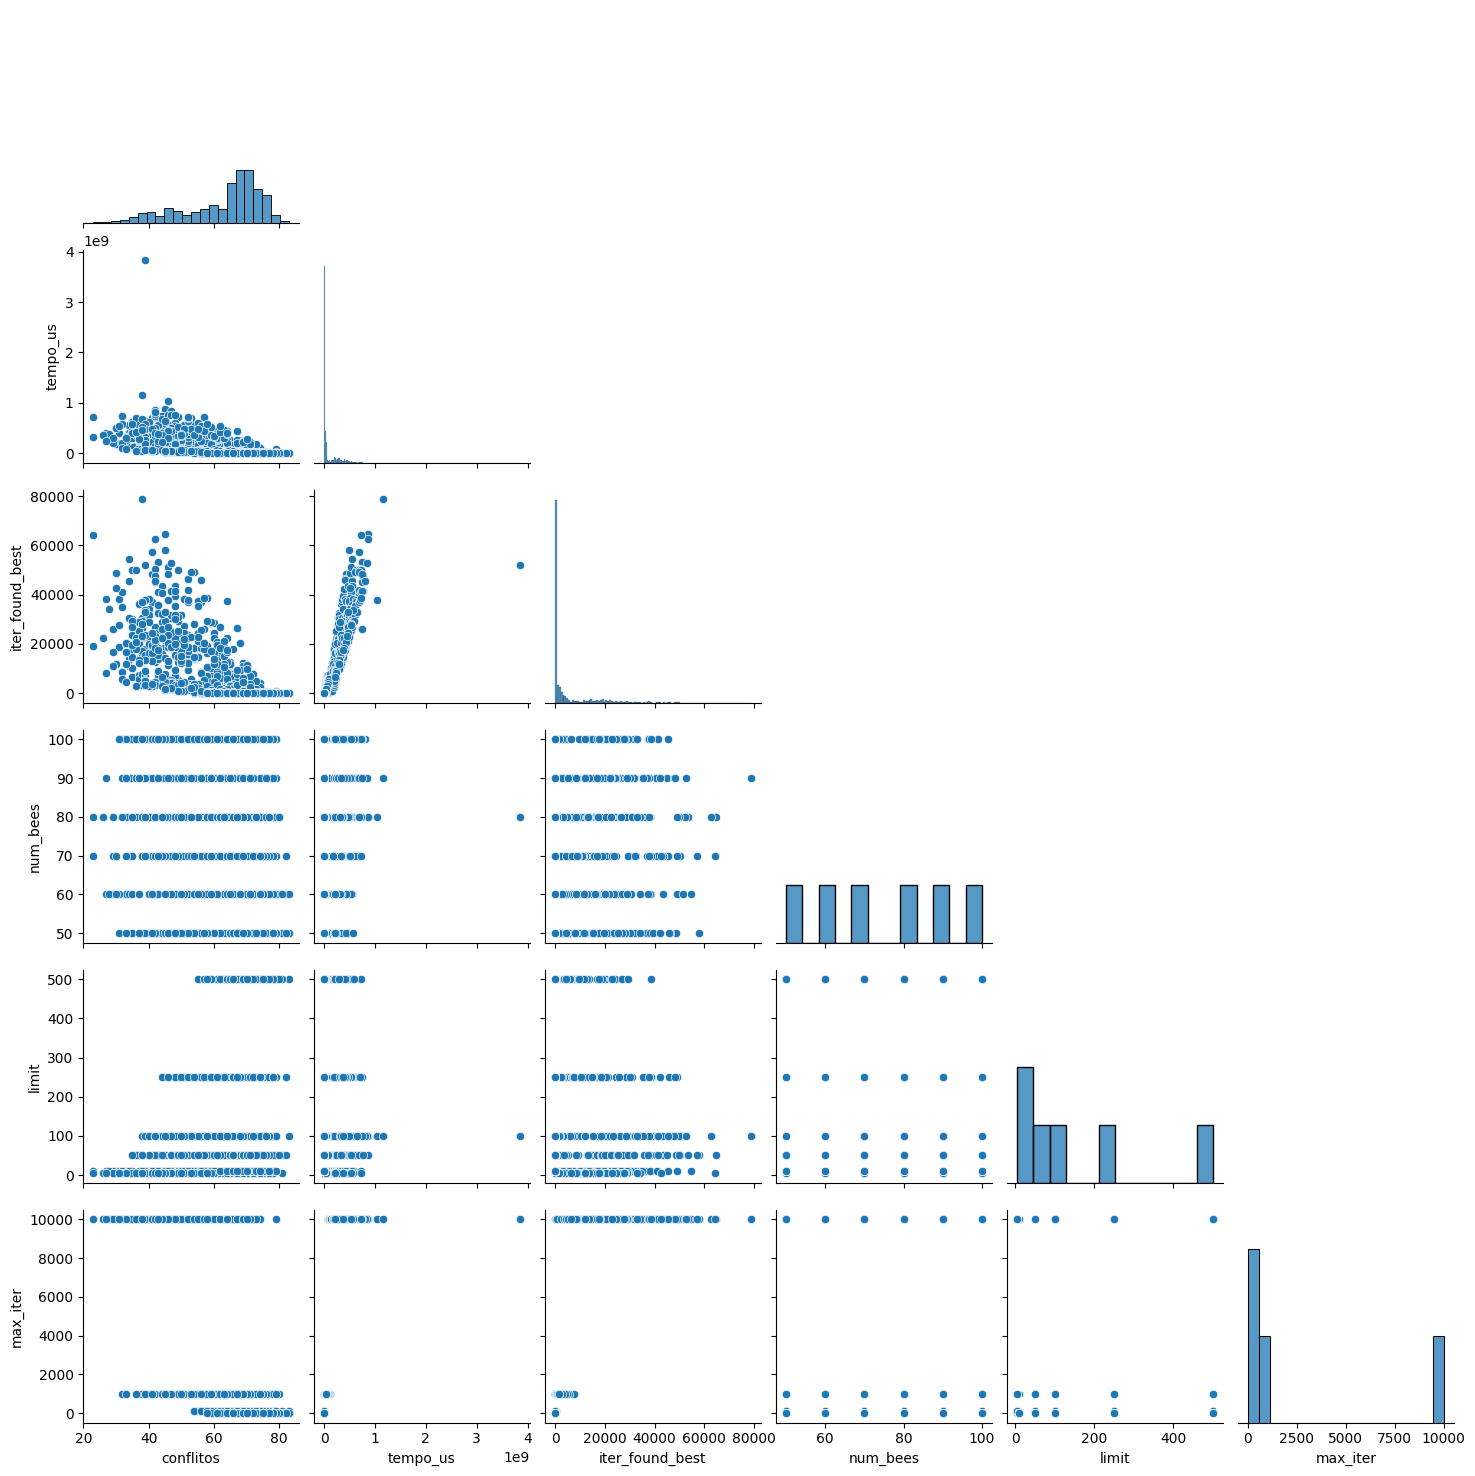

In [39]:
pairplot_columns = ["conflitos", "tempo_us", "iter_found_best", "num_bees", "limit", "max_iter"]
sns.pairplot(df, vars=pairplot_columns, corner=True)

<Axes: xlabel='conflitos', ylabel='tempo_us'>

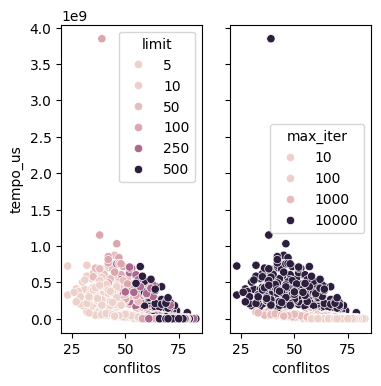

In [40]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharey=True)
sns.scatterplot(df, x='conflitos', y='tempo_us', hue='limit', ax=axes[0])
sns.scatterplot(df, x='conflitos', y='tempo_us', hue='max_iter', ax=axes[1])

In [41]:
df[df['conflitos']==df['conflitos'].min()].head()

,conflitos,tempo_us,iter_found_best,num_bees,limit,max_iter,filename,random_search,num_vertices,num_edges
471,23,325354337,18995,80,10,10000,instances/DSJC250.1.col,p,250,3218
1019,23,724544447,64437,70,5,10000,instances/DSJC250.1.col,p,250,3218


## Estatística

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

### Matriz de correlação

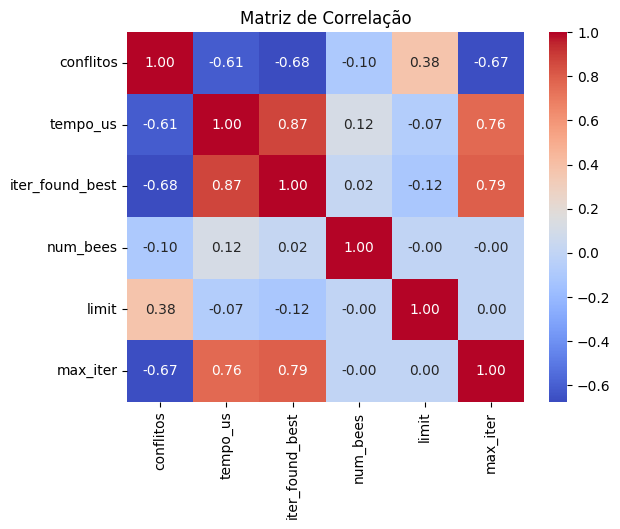

In [43]:
corr_matrix = df[["conflitos", "tempo_us", "iter_found_best", "num_bees", "limit", "max_iter"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

### Teste de Normalidade (Shapiro-Wilk)

In [44]:
for col in ["conflitos", "tempo_us", "iter_found_best"]:
    stat, p = stats.shapiro(df[col])
    print(f"Teste de Shapiro-Wilk para {col}: p-valor = {p:.4f}")

Teste de Shapiro-Wilk para conflitos: p-valor = 0.0000
Teste de Shapiro-Wilk para tempo_us: p-valor = 0.0000
Teste de Shapiro-Wilk para iter_found_best: p-valor = 0.0000


###  ANOVA/Kruskal-Wallis para Comparação de Grupos

In [45]:
# Comparando conflitos entre diferentes valores de num_bees
groups = [df[df["num_bees"] == b]["conflitos"] for b in df["num_bees"].unique()]
stat, p = stats.kruskal(*groups)
print(f"Kruskal-Wallis para num_bees: p-valor = {p:.4f}")

Kruskal-Wallis para num_bees: p-valor = 0.0001


### Regressão Múltipla (Impacto dos Parâmetros sobre Conflitos)

In [46]:
import statsmodels.api as sm

# Definir variáveis independentes e dependente
X = df[["num_bees", "limit", "max_iter"]]
X = sm.add_constant(X)  # Adicionar constante para o modelo
y = df["conflitos"]

# Ajustar modelo de regressão
model = sm.OLS(y, X).fit()
print(model.summary())

ModuleNotFoundError: No module named 'statsmodels'

### Boxplots para Comparação de Parâmetros

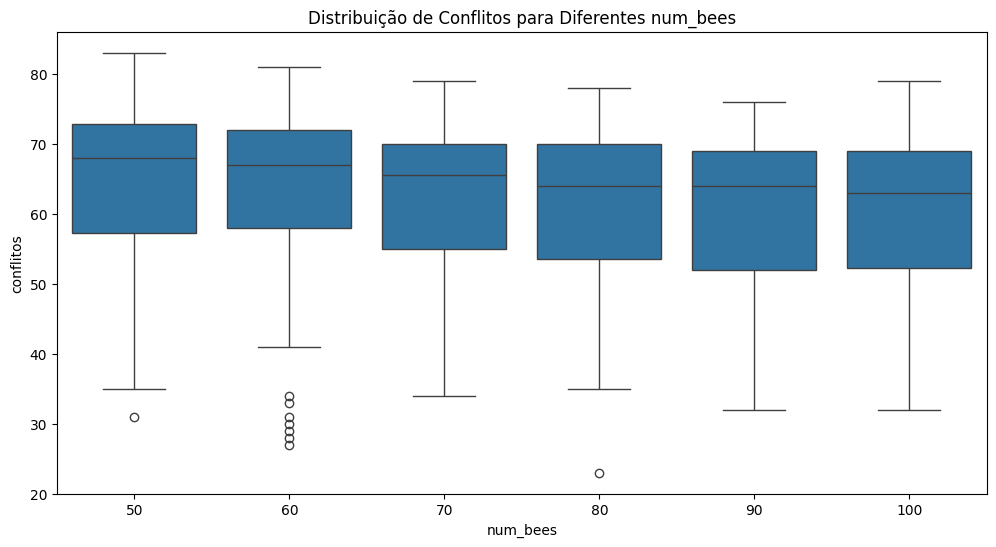

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="num_bees", y="conflitos", data=df)
plt.title("Distribuição de Conflitos para Diferentes num_bees")
plt.show()

### Scatterplots para Identificar Tendências

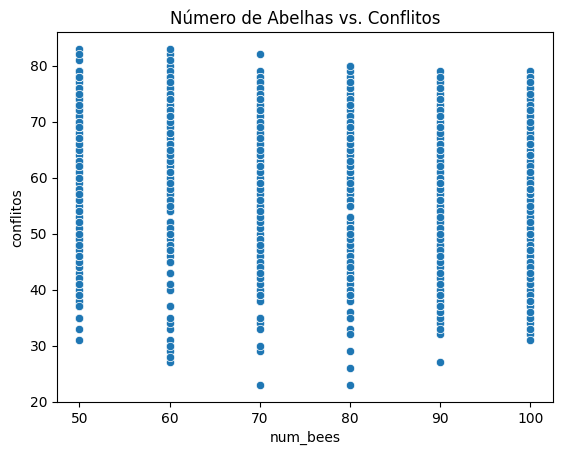

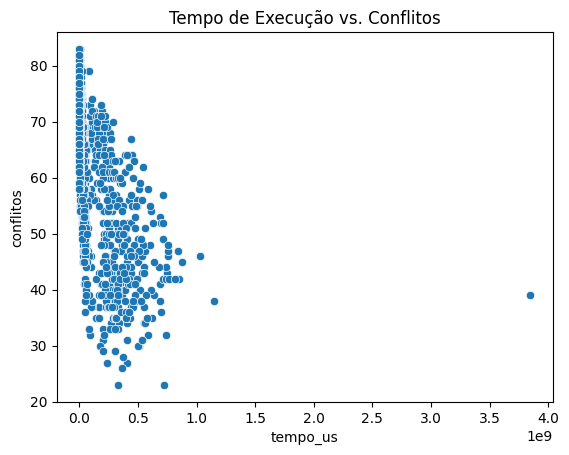

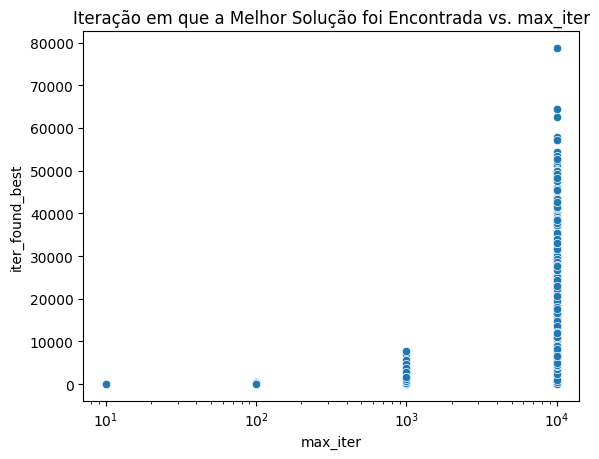

In [50]:
sns.scatterplot(x="num_bees", y="conflitos", data=df)
plt.title("Número de Abelhas vs. Conflitos")
plt.show()

sns.scatterplot(x="tempo_us", y="conflitos", data=df)
plt.title("Tempo de Execução vs. Conflitos")
plt.show()

sns.scatterplot(x="max_iter", y="iter_found_best", data=df)
plt.title("Iteração em que a Melhor Solução foi Encontrada vs. max_iter")
plt.xscale("log")
plt.show()


### Heatmap para Relação entre Parâmetros

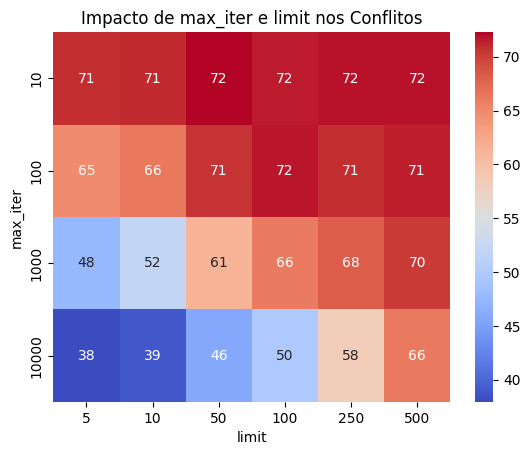

In [51]:
heatmap_data = df.pivot_table(values="conflitos", index="max_iter", columns="limit", aggfunc="mean")
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True)
plt.title("Impacto de max_iter e limit nos Conflitos")
plt.show()

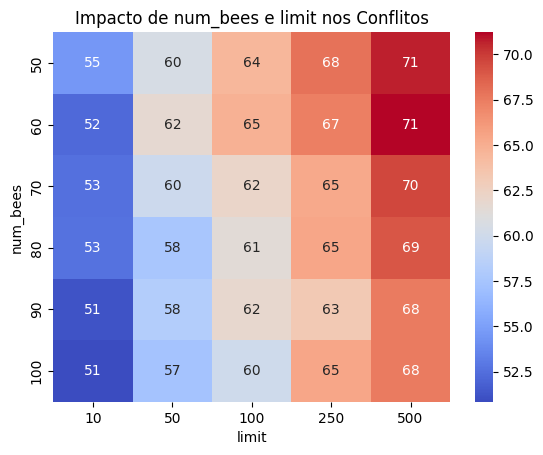

In [ ]:
heatmap_data = df.pivot_table(values="conflitos", index="num_bees", columns="limit", aggfunc="mean")
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True)
plt.title("Impacto de num_bees e limit nos Conflitos")
plt.show()

### Superfície 3D para Análise de Parâmetros

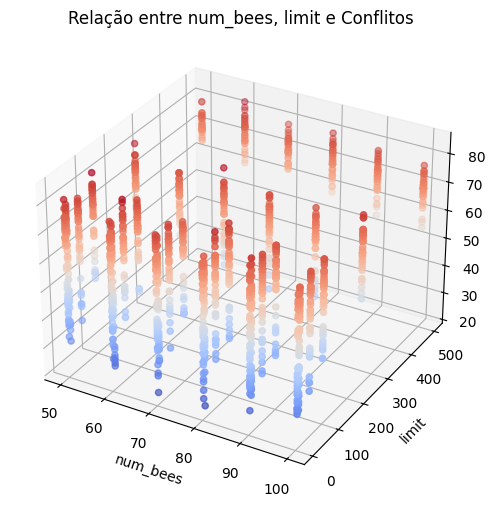

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["num_bees"], df["limit"], df["conflitos"], c=df["conflitos"], cmap="coolwarm")
ax.set_xlabel("num_bees")
ax.set_ylabel("limit")
ax.set_zlabel("conflitos")
plt.title("Relação entre num_bees, limit e Conflitos")
plt.show()

### Comparação das Top-10 Melhores Execuções

In [52]:
top_10 = df.nsmallest(10, "conflitos")  # Pega as 10 execuções com menos conflitos
print(top_10[["num_bees", "limit", "max_iter", "conflitos"]])

      num_bees  limit  max_iter  conflitos
471         80     10     10000         23
1019        70      5     10000         23
1053        80      5     10000         26
173         60     10     10000         27
1095        90      5     10000         27
179         60     10     10000         28
175         60     10     10000         29
1010        70      5     10000         29
1051        80      5     10000         29
171         60     10     10000         30
